In [2]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

projectdir = Path('.').resolve().parents[2]
path = f'{projectdir}/milestones/data/targetscan/unweighted_TargetScanHuman_human_mouse_mir197_mir769.tsv'

tardf = pd.read_csv(path, sep='\t')
a = np.char.array(tardf['organism'].values)
b = np.char.array(tardf['mirna'].values)
tardf['label'] = (a + b'|' + b).astype(str)
tardf.drop(columns=['organism', 'mirna'], inplace=True)
display(tardf)

,target_gene,Total context++ score,label
0,M6PR,-0.073,mouse|mir769
1,CYP26B1,-0.028,mouse|mir769
2,PDK4,-0.148,mouse|mir769
3,BAIAP2L1,-0.100,mouse|mir769
4,HOXA11,-0.123,mouse|mir769
...,...,...,...
14843,GPRIN3,-0.020,human|mir197
14844,GRIN2B,-0.190,human|mir197
14845,SLC25A16,-0.010,human|mir197
14846,RPAP2,-0.120,human|mir197


## Pive to wide format and filter for at least one condition above threshold

In [10]:
pivdf = tardf.pivot_table(values='Total context++ score', index=['target_gene'], columns=['label'], fill_value=0)
t = -0.2
pivdf = pivdf[pivdf.lt(t).any(axis=1)]
display(pivdf)

label,human|mir197,human|mir769,mouse|mir197,mouse|mir769
target_gene,,,,
AACS,-0.360,0.000,0.000,-0.040
AADACL3,-0.107,0.000,-0.380,-0.226
AAED1,0.000,0.000,-0.472,0.000
AAGAB,0.000,-0.146,-0.218,-0.126
AAK1,-0.210,-0.020,-0.160,-0.020
...,...,...,...,...
ZSCAN2,-0.130,-0.610,0.000,0.000
ZSCAN20,-0.070,0.000,-0.203,0.000
ZSCAN25,-0.307,0.000,-0.049,0.000


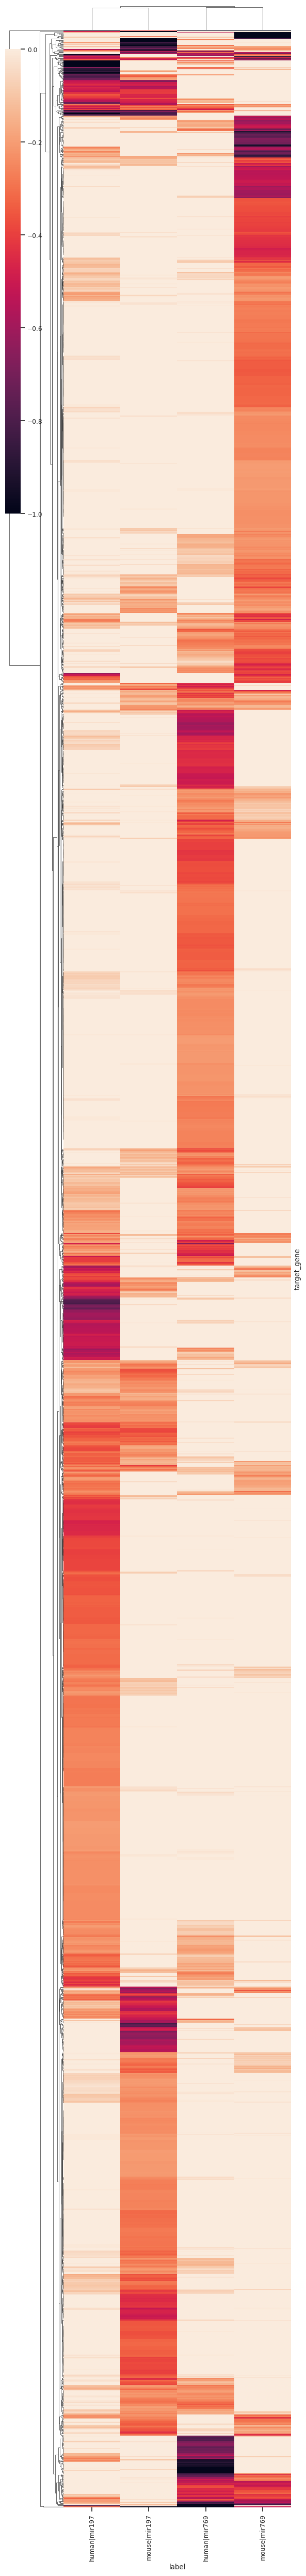

In [17]:
# sns.set(rc={'figure.figsize':(4,30), 'ytick.left': True, 'xtick.bottom': True}, font_scale = 0.8, style='whitegrid')

sns.clustermap(
    pivdf,
    yticklabels=False, 
    figsize=(6,50), 
    # linewidth=0.05, 
    vmin=-1,
    dendrogram_ratio=(0.2,0.01)
    )
plt.show()


In [ ]:
sns.heatmap(tardf)

ValueError: could not convert string to float: 'M6PR'